<a href="https://www.kaggle.com/code/sharmageetika/ipl-analysis?scriptVersionId=93072465" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2021.csv
/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2021.csv


**Questions Addressed:**\
What is the percentage of wins of each team?\
Which venue results in a win for Batting first team and vice versa?\
Who is the most consistent batsman and bowler in each team and also in the entire league?\
Who wins the most player of the matches in the tournament?\
Predict the winning team with the consistency of wins and ball deliveries?\
Who is the most valuable player of every season?

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

**Reading the data**

In [3]:
balls=pd.read_csv("../input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2021.csv")
matches=pd.read_csv("../input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2021.csv")
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,1254117,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1254117,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1254117,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [4]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [5]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             857
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [6]:
balls.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           197043
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           197803
kind                 197803
fielders_involved    200758
BattingTeam               0
dtype: int64

In [7]:
print("Matches played at :", matches["City"].unique())
print("\n Teams Participated :", matches["Team1"].unique())
print("\n Matches played so far: ",matches.shape[0])

Matches played at : ['Dubai' 'Sharjah' 'Abu Dhabi' 'Ahmedabad' 'Delhi' 'Chennai' 'Mumbai' nan
 'Hyderabad' 'Visakhapatnam' 'Chandigarh' 'Bengaluru' 'Kolkata' 'Jaipur'
 'Pune' 'Indore' 'Bangalore' 'Kanpur' 'Rajkot' 'Raipur' 'Ranchi' 'Cuttack'
 'Dharamsala' 'Kochi' 'Nagpur' 'Johannesburg' 'Centurion' 'Durban'
 'Bloemfontein' 'Port Elizabeth' 'Kimberley' 'East London' 'Cape Town']

 Teams Participated : ['Chennai Super Kings' 'Delhi Capitals' 'Royal Challengers Bangalore'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Punjab Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']

 Matches played so far:  876


In [8]:
matches['Season']=pd.DatetimeIndex(matches["Date"]).year
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


**Matches per season**

[Learn more about groupby function](https://medium.com/@GeetikaSh/groupby-in-pandas-662001585669)

In [9]:
matches_per_season=matches.groupby(["Season"])["ID"].count().reset_index().rename(columns={"ID":"Matches"})
print(matches_per_season)

    Season  Matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60
12    2020       60
13    2021       60


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


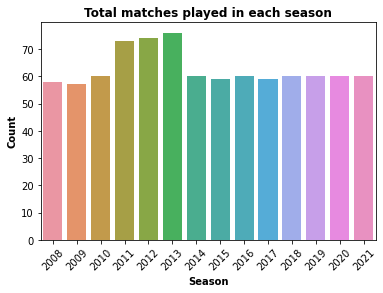

In [10]:
sns.countplot(matches["Season"])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Season", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Total matches played in each season", fontsize=12,fontweight="bold")
plt.show()

**What is the percentage of wins of each team?**

In [11]:
winning_team=matches.groupby(["WinningTeam"])["ID"].count().reset_index().rename(columns={"ID":"Matches Won"})
print(winning_team)

                    WinningTeam  Matches Won
0           Chennai Super Kings          117
1               Deccan Chargers           29
2                Delhi Capitals           29
3              Delhi Daredevils           67
4                 Gujarat Lions           13
5               Kings XI Punjab           88
6          Kochi Tuskers Kerala            6
7         Kolkata Knight Riders          108
8                Mumbai Indians          127
9                 Pune Warriors           12
10                 Punjab Kings            6
11             Rajasthan Royals           86
12       Rising Pune Supergiant           10
13      Rising Pune Supergiants            5
14  Royal Challengers Bangalore          100
15          Sunrisers Hyderabad           69


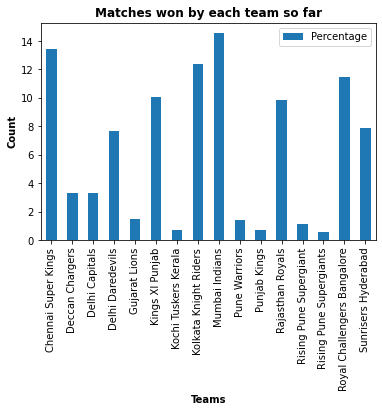

In [12]:
winning_team["Percentage"]=((winning_team["Matches Won"]/winning_team["Matches Won"].sum())*100).sort_values()
winning_team.plot(x="WinningTeam",y="Percentage",kind='bar')
plt.xlabel("Teams", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Matches won by each team so far", fontsize=12,fontweight="bold")
plt.show()

**<font color='blue'>Mumbai Indians (127 matches won) has the highest winning rate followed by Cennai Super Kings and Kolkata Knight Riders (117, 108 matches won respectively).\
<font color='blue'>Worst team is Punjab Kings(6 matches won)**

**Which venue results in a win for Batting first team and vice versa?**

In [13]:

venue=matches[["Venue","Team1","Team2","TossWinner","TossDecision","WinningTeam"]]
venue["TossLosser"]=matches["Team1"]
venue.loc[venue["TossWinner"]!=venue["Team1"],"TossLosser"]=venue["Team1"]
venue


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Venue,Team1,Team2,TossWinner,TossDecision,WinningTeam,TossLosser
0,Dubai International Cricket Stadium,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Chennai Super Kings,Chennai Super Kings
1,Sharjah Cricket Stadium,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Delhi Capitals
2,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,Kolkata Knight Riders,Royal Challengers Bangalore
3,Dubai International Cricket Stadium,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,Delhi Capitals
4,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,Mumbai Indians
...,...,...,...,...,...,...,...
871,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians
872,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,Kolkata Knight Riders
873,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,Delhi Daredevils
874,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,Kings XI Punjab


In [14]:
venue.loc[venue["TossDecision"]=="bat","BattingTeam"]=venue["TossWinner"]
venue.loc[venue["TossDecision"]=="field","BattingTeam"]=venue["TossLosser"]
venue=venue.drop(columns=["Team1","Team2","TossDecision","TossWinner","TossLosser"])
venue.loc[venue["WinningTeam"]==venue["BattingTeam"],"BattingWin"]=1
venue.loc[venue["WinningTeam"]!=venue["BattingTeam"],"BattingWin"]=0
venue

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Venue,WinningTeam,BattingTeam,BattingWin
0,Dubai International Cricket Stadium,Chennai Super Kings,Chennai Super Kings,1.0
1,Sharjah Cricket Stadium,Kolkata Knight Riders,Delhi Capitals,0.0
2,Sharjah Cricket Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,0.0
3,Dubai International Cricket Stadium,Chennai Super Kings,Delhi Capitals,0.0
4,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,Mumbai Indians,1.0
...,...,...,...,...
871,Wankhede Stadium,Royal Challengers Bangalore,Mumbai Indians,0.0
872,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,0.0
873,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,0.0
874,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Chennai Super Kings,1.0


In [15]:
batting_win=venue[venue["BattingWin"]==1]
batting_win=batting_win.drop(columns=["BattingWin"])
batting_losses=venue[venue["BattingWin"]==0]
batting_losses=batting_losses.drop(columns=["BattingWin"])
batting_win

,Venue,WinningTeam,BattingTeam
0,Dubai International Cricket Stadium,Chennai Super Kings,Chennai Super Kings
4,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,Mumbai Indians
6,Sharjah Cricket Stadium,Kolkata Knight Riders,Kolkata Knight Riders
8,"Zayed Cricket Stadium, Abu Dhabi",Sunrisers Hyderabad,Sunrisers Hyderabad
12,Sharjah Cricket Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...,...
859,Feroz Shah Kotla,Delhi Daredevils,Delhi Daredevils
861,M Chinnaswamy Stadium,Chennai Super Kings,Chennai Super Kings
866,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Kings XI Punjab
868,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Chennai Super Kings


In [16]:
x=batting_win.groupby("Venue")["Venue"].count()
y=batting_losses.groupby("Venue")["Venue"].count()


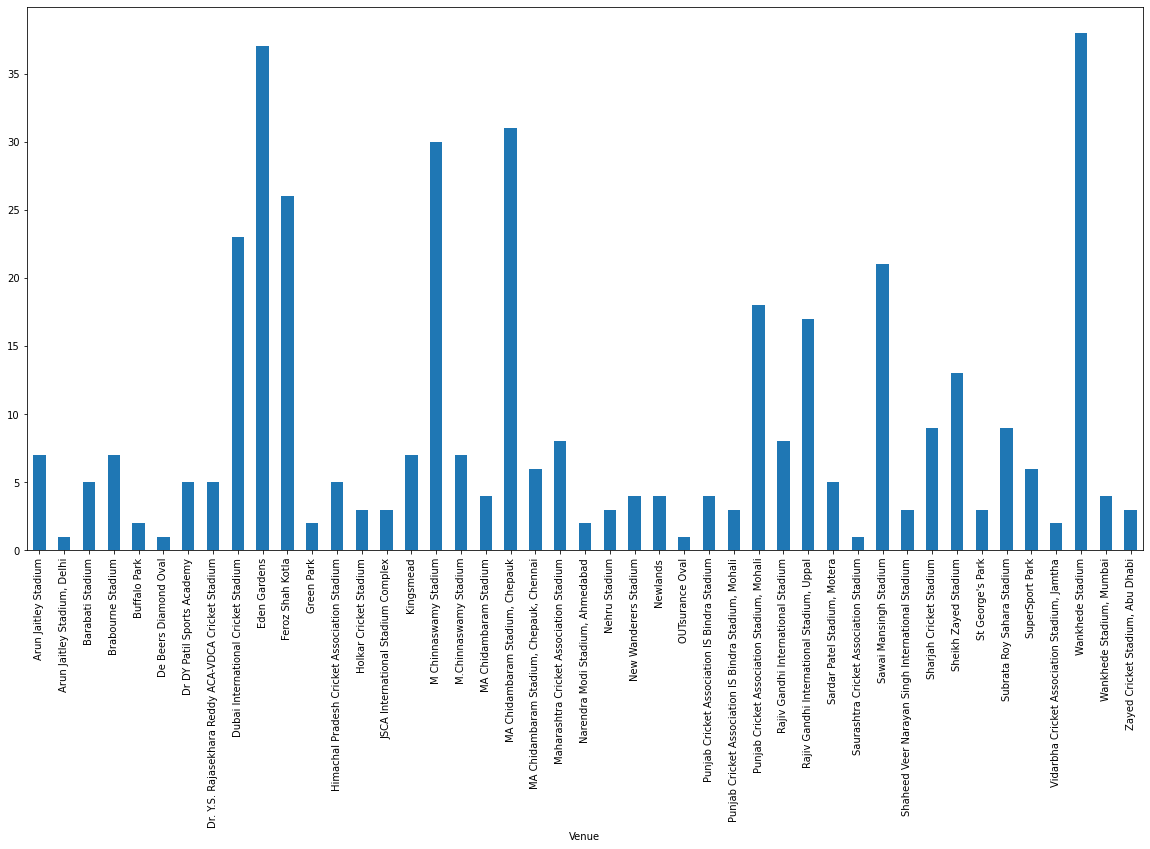

In [17]:
plt.figure(figsize=(20,10))
batting_win.groupby("Venue")["Venue"].count().plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

In [18]:
matches.Venue[matches.WonBy != "Wickets"].mode()

0    Wankhede Stadium
dtype: object

**<font color='blue'>Wankhede Stadium is best for the teams who are batting first**

**Which stadium is best for winning wickets**

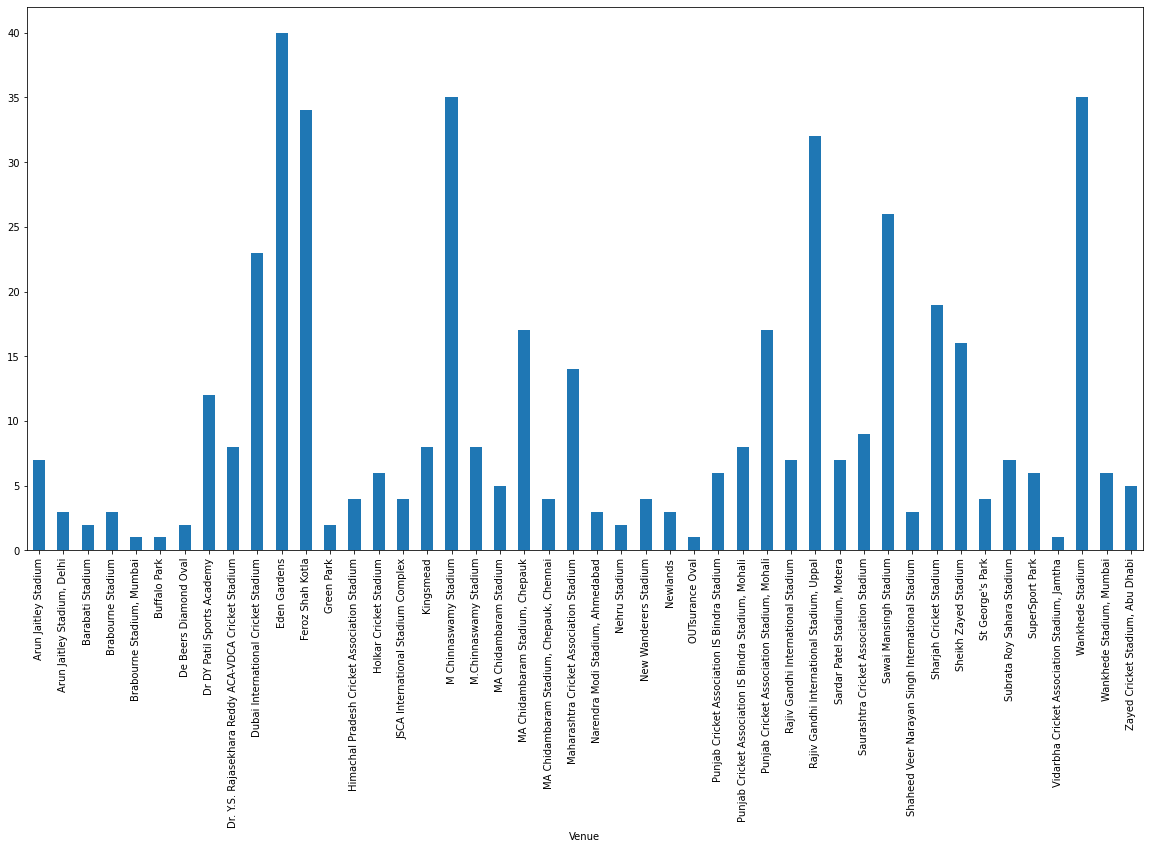

In [19]:
plt.figure(figsize=(20,10))
batting_losses.groupby("Venue")["Venue"].count().plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

In [20]:
matches.Venue[matches.WonBy != "Runs"].mode()

0    Eden Gardens
dtype: object

**<font color='blue'>If a team is fielding first then there are high chances of them to win in Eden Garden**

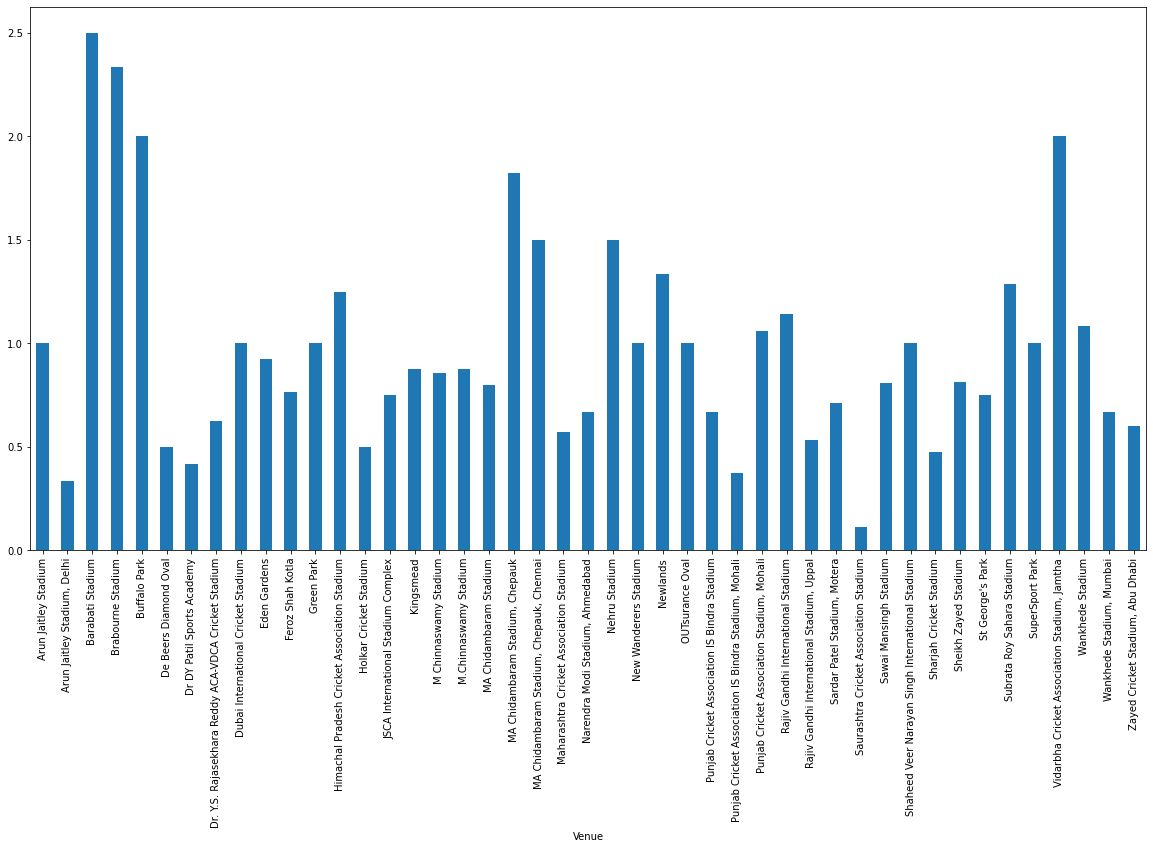

In [21]:
z=x/y
z=z.dropna()
plt.figure(figsize=(20,10))
z.plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()


Success ratio of team that is batting first is maximum at Barabati Stadium .

**Who wins the most player of the matches in the tournament?**

In [22]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [23]:
player=matches[["Team1","Team2","Player_of_Match","Team1Players","Team2Players"]]
player

,Team1,Team2,Player_of_Match,Team1Players,Team2Players
0,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari..."
1,Delhi Capitals,Kolkata Knight Riders,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip..."
2,Royal Challengers Bangalore,Kolkata Knight Riders,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ..."
3,Delhi Capitals,Chennai Super Kings,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '..."
4,Mumbai Indians,Sunrisers Hyderabad,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo..."
...,...,...,...,...,...
871,Mumbai Indians,Royal Challengers Bangalore,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '..."
872,Kolkata Knight Riders,Deccan Chargers,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma..."
873,Delhi Daredevils,Rajasthan Royals,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'..."
874,Kings XI Punjab,Chennai Super Kings,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."


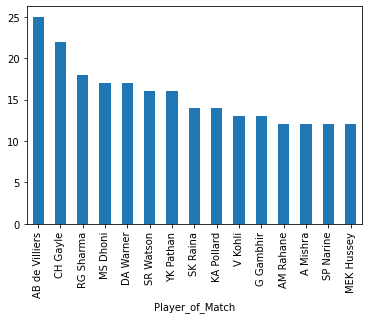

In [24]:
player_of_match=player.groupby("Player_of_Match")["Player_of_Match"].count().sort_values(ascending=False)
player_of_match[:15].plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

**<font color='blue'>Best Player is AB de Villers  and won the most player of the match (25)**

**Run in each season**

[join in pandas](https://medium.com/@GeetikaSh/difference-between-left-join-and-right-join-e4fcc6f58b82)

In [25]:
season_data=matches[["ID","Season"]].merge(balls,left_on="ID",right_on="ID", how="left").drop("ID", axis=1)
season_data.head()

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2021,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,2021,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,2021,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,2021,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,2021,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


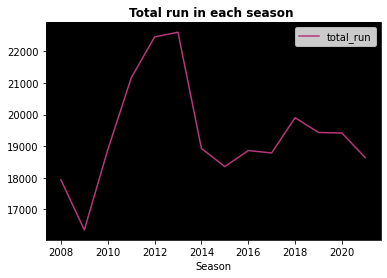

In [26]:
season=season_data.groupby(["Season"])["total_run"].sum().reset_index()
p=season.set_index("Season")
ax=plt.axes()
ax.set(facecolor="black")

sns.lineplot(data=p,palette="magma")
plt.title("Total run in each season ", fontsize=12, fontweight="bold")
plt.show()



In [27]:
run_per_season=pd.concat([matches_per_season,season.iloc[:,1]],axis=1)
run_per_season["Runs Scored per match"]=run_per_season["total_run"]/run_per_season["Matches"]
run_per_season.set_index("Season",inplace=True)
run_per_season

,Matches,total_run,Runs Scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


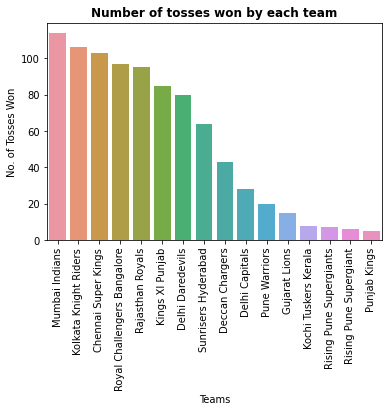

In [28]:
toss=matches["TossWinner"].value_counts()
sns.barplot(x=toss.index,y=toss)
plt.title("Number of tosses won by each team",fontsize=12,fontweight="bold")
plt.xlabel("Teams")
plt.ylabel("No. of Tosses Won")
plt.xticks(rotation='vertical')
plt.show()

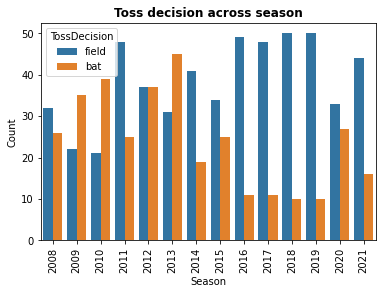

In [29]:
sns.countplot(x="Season",hue="TossDecision",data=matches)
plt.xticks(rotation='vertical')
plt.title("Toss decision across season",fontsize=12,fontweight="bold")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

the above plot shows the toss decision of the toss winning team

**Details about Winning Teams**

In [30]:
matches["WonBy"].value_counts()

Wickets      472
Runs         386
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

**<font color='blue'>from the above data we get to know that most of the matches are won by wickets. And 4 ties so far**

**Best Stadium for Each Team Respectively**

In [31]:
teams=matches["Team1"].unique()

In [32]:
'''I have done this because Deccan chargers has played equally well in two venues 
and hence I have done it's calculation seprately'''
teams1=teams[:14][:]
teams1=np.append(teams1,(teams[15][:]))
teams1

array(['Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [33]:

team=pd.DataFrame(columns=["Team","Stadium"])
for i in teams1:
    x=statistics.mode(matches.Venue[matches.WinningTeam== i])
    #team=team.append({'Team': i , "Stadium":matches.Venue[matches.WinningTeam== i].mode()}, ignore_index=True)
    print(i,":",x)


Chennai Super Kings : MA Chidambaram Stadium, Chepauk
Delhi Capitals : Dubai International Cricket Stadium
Royal Challengers Bangalore : M Chinnaswamy Stadium
Mumbai Indians : Wankhede Stadium
Kolkata Knight Riders : Eden Gardens
Sunrisers Hyderabad : Rajiv Gandhi International Stadium, Uppal
Rajasthan Royals : Sawai Mansingh Stadium
Punjab Kings : Dubai International Cricket Stadium
Kings XI Punjab : Punjab Cricket Association Stadium, Mohali
Delhi Daredevils : Feroz Shah Kotla
Rising Pune Supergiant : Maharashtra Cricket Association Stadium
Gujarat Lions : Saurashtra Cricket Association Stadium
Rising Pune Supergiants : Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Pune Warriors : Subrata Roy Sahara Stadium
Kochi Tuskers Kerala : Nehru Stadium


Kochi Tuskers Kerala and Deccan Chargers has equal wi

In [34]:
matches.Venue[matches.WinningTeam== "Deccan Chargers"].mode()

0                             Barabati Stadium
1    Rajiv Gandhi International Stadium, Uppal
dtype: object

**Predict the winning team with the consistency of wins and ball deliveries?**

In [35]:
matches.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough


In [36]:
matches.WinningTeam[matches.WonBy!='Runs'].mode()

0    Kolkata Knight Riders
dtype: object

**<font color=blue> Kolkata Knight Riders is the best chasing team**

**Best Deffending Team**

In [37]:
matches.WinningTeam[matches.WonBy!='Wickets'].mode()

0    Mumbai Indians
dtype: object

**<font color=blue>Mumbai Indian is the best defending team**

**Beat Team in last 5 seasons**

In [38]:
seasons=matches["Season"].unique()
seasons

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008])

In [39]:

for i in range(2016,2022):
    x=statistics.mode(matches.WinningTeam[matches.Season== i])
   
    print(i,":",x)


2016 : Sunrisers Hyderabad
2017 : Mumbai Indians
2018 : Chennai Super Kings
2019 : Mumbai Indians
2020 : Mumbai Indians
2021 : Chennai Super Kings


**Most valuable player each season**

In [40]:

seasons1=seasons[:1][:]
seasons1=np.append(seasons1,(seasons[2:4][:]))
seasons1=np.append(seasons1,(seasons[5:][:]))
for i in seasons1:
    x=statistics.mode(matches.Player_of_Match[matches.Season== i])
    
    print(i,":",x)

2021 : RD Gaikwad
2019 : AD Russell
2018 : Rashid Khan
2016 : V Kohli
2015 : DA Warner
2014 : GJ Maxwell
2013 : MEK Hussey
2012 : CH Gayle
2011 : CH Gayle
2010 : SR Tendulkar
2009 : YK Pathan
2008 : SE Marsh


Best Players in Season 2020

In [41]:
print(matches.Player_of_Match[matches.Season== 2020].mode())

0    AB de Villiers
1          KL Rahul
2        RD Gaikwad
3          TA Boult
dtype: object


Best Player in Season 2017

In [42]:
print(matches.Player_of_Match[matches.Season== 2017].mode())

0          BA Stokes
1    NM Coulter-Nile
dtype: object


**Does Winning the toss means winning the match**

In [43]:
toss=(matches["TossWinner"]==matches["WinningTeam"])
toss.mode()

0    True
dtype: bool

<font color=red>Yes mostly the winning teams have won the toss as well but it is not necessary, can be clarely observed from the figure below

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


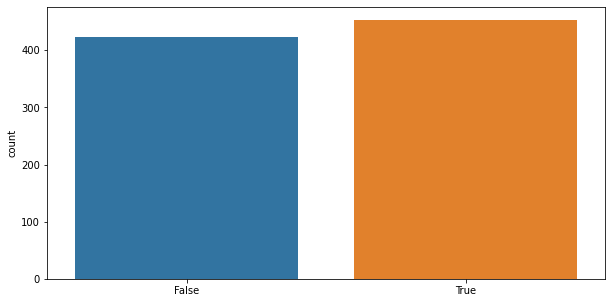

In [44]:

plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

In [45]:
matches.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


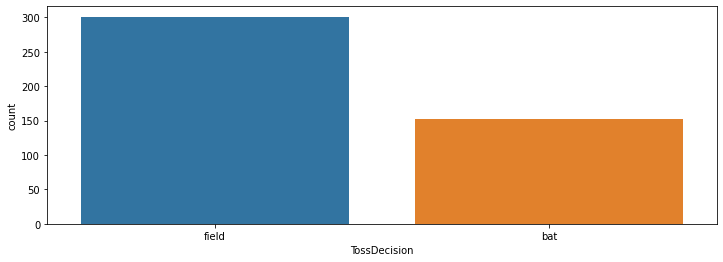

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(matches.TossDecision[matches.TossWinner==matches.WinningTeam])
plt.show()

**<font color=blue> Toss Winning teams mostly decided to field first, whichs hepls to win the match. As there are higher chances of winning when fielding first**

**How a player has performed thoughout IPL**

Lets see for Suraish Raina

In [47]:
Player=(balls['batter']=='SK Raina')
#Player2=(balls['bowler']=='SK Raina')

df_raina=balls[Player]
#df_raina.append(balls[Player2])
df_raina.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
1205,1254113,2,14,2,SK Raina,YS Chahal,AT Rayudu,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
1206,1254113,2,14,3,SK Raina,YS Chahal,AT Rayudu,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1208,1254113,2,14,5,SK Raina,YS Chahal,AT Rayudu,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
1209,1254113,2,14,6,SK Raina,YS Chahal,AT Rayudu,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
1218,1254113,2,16,3,SK Raina,PWH de Silva,MS Dhoni,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


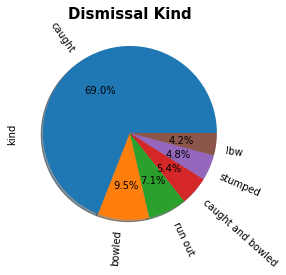

In [48]:
df_raina['kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontsize=15,fontweight="bold")
plt.show()

In [49]:
def count(df_raina,runs):
    return len(df_raina['batsman_run']==runs)*runs
print("Runs scored for 1's : ", count(df_raina,1))
print("Runs scored for 2's : ", count(df_raina,2))
print("Runs scored for 3's : ", count(df_raina,3))
print("Runs scored for 4's : ", count(df_raina,4))
print("Runs scored for 6's : ", count(df_raina,6))


Runs scored for 1's :  4177
Runs scored for 2's :  8354
Runs scored for 3's :  12531
Runs scored for 4's :  16708
Runs scored for 6's :  25062


**Details of the match that has biggest win in the run margin:**

In [50]:
matches[matches["Margin"]==matches["Margin"].max()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
256,1082635,Delhi,2017-05-06,2017,45,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,N,Mumbai Indians,Runs,146.0,NaN,LMP Simmons,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['LMP Simmons', 'PA Patel', 'KA Pollard', 'RG ...",Nitin Menon,CK Nandan


**Players who have scored maximum run so far in IPL**

In [51]:
balls.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings


In [52]:
runs=balls.groupby(["batter"])["batsman_run"].sum().sort_values(ascending=False).reset_index()
runs.columns=["Batsman","Runs"]
y=runs.head(10)
y

,Batsman,Runs
0,V Kohli,6293
1,S Dhawan,5784
2,RG Sharma,5613
3,SK Raina,5536
4,DA Warner,5451
5,AB de Villiers,5181
6,CH Gayle,4997
7,MS Dhoni,4746
8,RV Uthappa,4724
9,G Gambhir,4217


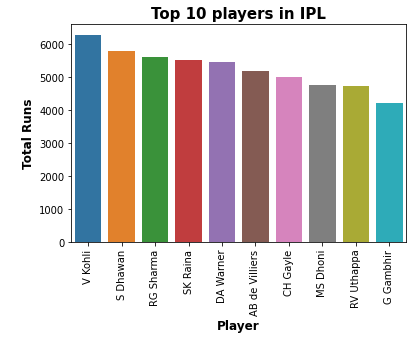

In [53]:
sns.barplot(x=y["Batsman"],y=y["Runs"])
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Player',fontsize=12,fontweight="bold")
plt.ylabel('\nTotal Runs',fontsize=12,fontweight="bold")
plt.title("Top 10 players in IPL", fontsize=15, fontweight="bold")
plt.show()

**<font color=blue> Virat Kohli has scored maimum run in IPL**

In [54]:
runs_per_season=season_data.groupby(["batter","Season"])["batsman_run"].sum().sort_values(ascending=False).reset_index()
runs_per_season

,batter,Season,batsman_run
0,V Kohli,2016,973
1,DA Warner,2016,848
2,KS Williamson,2018,735
3,CH Gayle,2012,733
4,MEK Hussey,2013,733
...,...,...,...
2090,AJ Tye,2019,0
2091,BA Stokes,2021,0
2092,S Kaul,2017,0
2093,BA Bhatt,2011,0


****

****